CÂN BẰNG LƯỢC ĐỒ ẢNH XÁM

In [1]:
from library import *

In [4]:
def histogram_equalization(image, nbr_bins=256):
    # Ensure the Gray image is Input
    if image.mode != 'L':
        image = image.convert('L')
    
    # Change the image to numpy array
    image_array = np.array(image)

    # Calculate thr image's histogram
    histogram, bins = np.histogram(image_array, bins=nbr_bins, range=(0, 256), density=True)

    # Calculate CDF
    cdf = histogram.cumsum()
    cdf = 255 * cdf/cdf[-1]

    # Lấy giá trị mới cho từng pixel dựa trên CDF
    image_equalized = np.interp(image_array, bins[:-1], cdf)

    # Chuyển đổi mảng kết quả thành hình ảnh
    equalized_image = Image.fromarray(image_equalized.astype('uint8'))

    return equalized_image


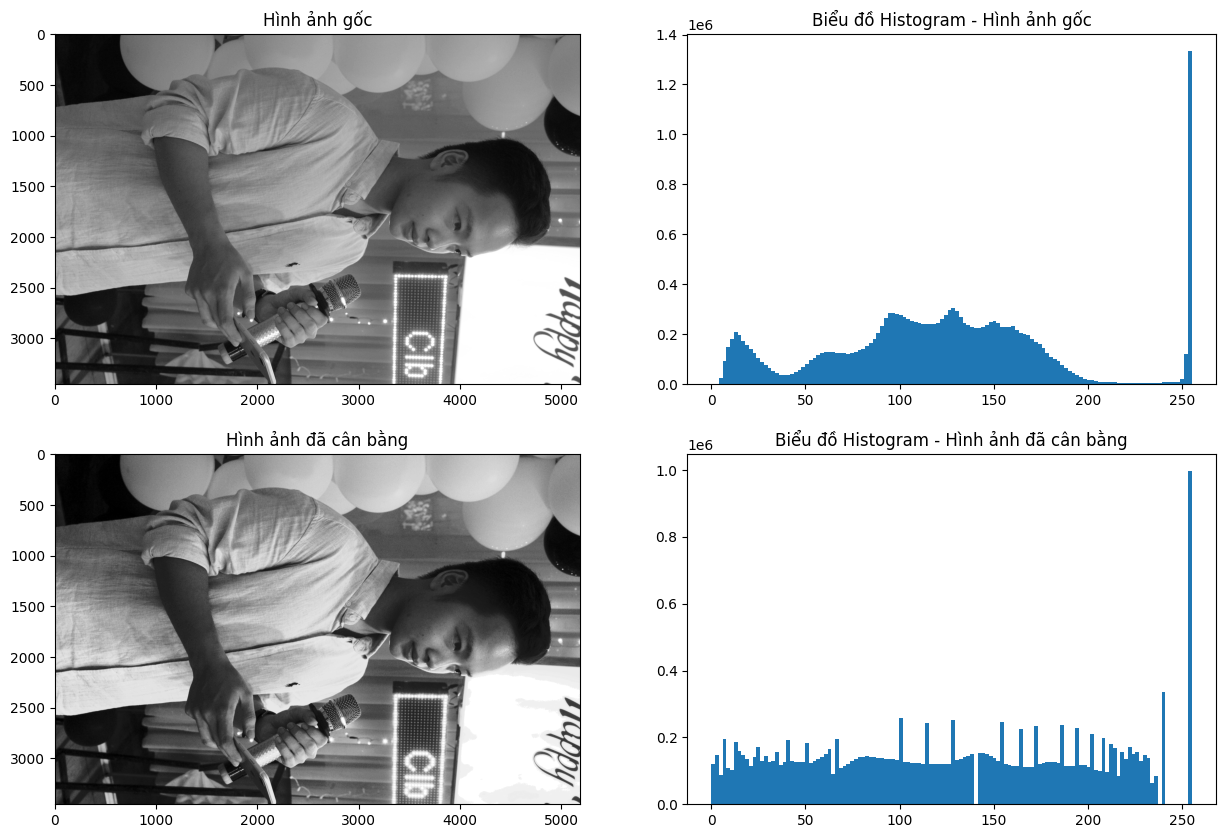

In [5]:
img = Image.open("C:\\Users\\nguye\\OneDrive\\Documents\\Nguyễn Quang Nhật\\Quang Nhat\\IMG_1043.JPG")

# Apply equalized histogram
equalized_image = histogram_equalization(img)

# Tạo một lưới 2x2 để hiển thị hình ảnh và biểu đồ
plt.figure(figsize=(15, 10))

# Hiển thị hình ảnh gốc
plt.subplot(2, 2, 1)
plt.imshow(img.convert('L'), cmap='gray')
plt.title('Hình ảnh gốc')

# Vẽ biểu đồ histogram của hình ảnh gốc
plt.subplot(2, 2, 2)
plt.hist(np.array(img.convert('L')).flatten(), bins=128)
plt.title('Biểu đồ Histogram - Hình ảnh gốc')

# Hiển thị hình ảnh đã cân bằng
plt.subplot(2, 2, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Hình ảnh đã cân bằng')

# Vẽ biểu đồ histogram của hình ảnh đã cân bằng
plt.subplot(2, 2, 4)
plt.hist(np.array(equalized_image).flatten(), bins=128)
plt.title('Biểu đồ Histogram - Hình ảnh đã cân bằng')

plt.show()
